In [1]:
import pandas as pd

In [3]:
dataset_path = "../datasets/ENB2012_data.xlsx"
df = pd.read_excel(dataset_path)

df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [53]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [12]:
data_df = df.iloc[:, :7]
data_df

,X1,X2,X3,X4,X5,X6,X7
0,0.98,514.5,294.0,110.25,7.0,2,0.0
1,0.98,514.5,294.0,110.25,7.0,3,0.0
2,0.98,514.5,294.0,110.25,7.0,4,0.0
3,0.98,514.5,294.0,110.25,7.0,5,0.0
4,0.90,563.5,318.5,122.50,7.0,2,0.0
...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4
764,0.62,808.5,367.5,220.50,3.5,2,0.4
765,0.62,808.5,367.5,220.50,3.5,3,0.4
766,0.62,808.5,367.5,220.50,3.5,4,0.4


In [15]:
target_df = df.iloc[:, -2:]
target_df

,Y1,Y2
0,15.55,21.33
1,15.55,21.33
2,15.55,21.33
3,15.55,21.33
4,20.84,28.28
...,...,...
763,17.88,21.40
764,16.54,16.88
765,16.44,17.11
766,16.48,16.61


In [30]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_df, target_df, random_state=42, train_size=0.8)

print(f"x_train_shape: {x_train.shape}")
print(f"y_train_shape: {y_train.shape}")
print(f"x_test_shape: {x_test.shape}")
print(f"y_test_shape: {y_test.shape}")

x_train_shape: (614, 7)
y_train_shape: (614, 2)
x_test_shape: (154, 7)
y_test_shape: (154, 2)


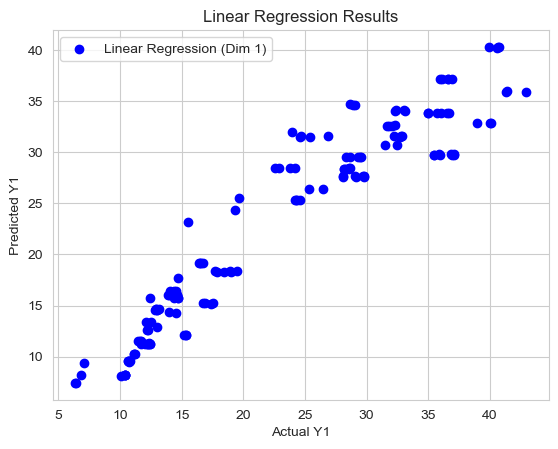

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Assuming data_df is your feature DataFrame and target_df is your target variable DataFrame

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data_df.values, target_df.values, random_state=42, train_size=0.8)

# Linear Regression (lm) Analog
lm_model = LinearRegression()
lm_model.fit(x_train, y_train)

# Predictions
lm_predictions = lm_model.predict(x_test)

# Plotting the results
plt.scatter(y_test[:, 0], lm_predictions[:, 0], color='blue', label='Linear Regression (Dim 1)')

plt.title('Linear Regression Results')
plt.xlabel('Actual Y1')
plt.ylabel('Predicted Y1')
plt.legend()
plt.show()

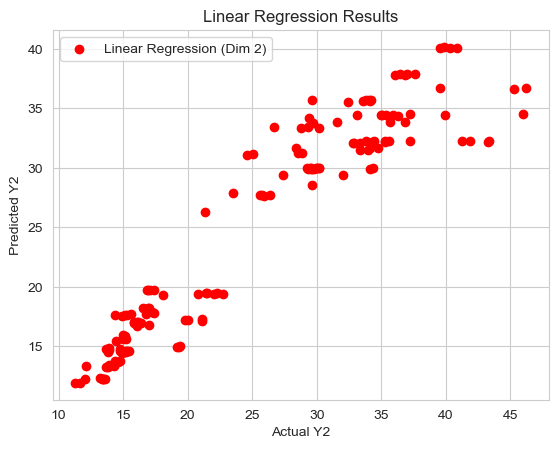

In [41]:
plt.scatter(y_test[:, 1], lm_predictions[:, 1], color='red', label='Linear Regression (Dim 2)')
plt.title('Linear Regression Results')
plt.xlabel('Actual Y2')
plt.ylabel('Predicted Y2')
plt.legend()
plt.show()

C:\Users\Ruslan\anaconda3\envs\ai1-np\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Ruslan\anaconda3\envs\ai1-np\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

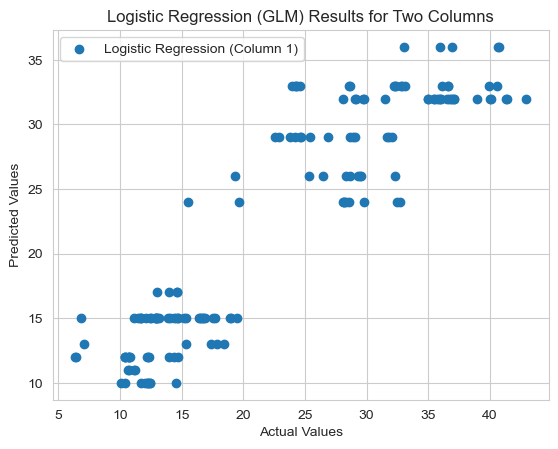

In [64]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Assuming x_train, y_train, x_test, and y_test are already defined
x_train, x_test, y_train, y_test = train_test_split(data_df, target_df, random_state=42, train_size=0.8)

# Logistic Regression (glm) Analog for the first column
glm_model_1 = LogisticRegression(max_iter=1000)
glm_model_1.fit(x_train, y_train.iloc[:, 0].round(0))

# Predictions for the first column
glm_predictions_1 = glm_model_1.predict(x_test)

# Logistic Regression (glm) Analog for the second column
glm_model_2 = LogisticRegression(max_iter=1000)
lab_enc_2 = LabelEncoder()
glm_model_2.fit(x_train, y_train.iloc[:, 1].round(0))

# Predictions for the second column
glm_predictions_2 = glm_model_2.predict(x_test)

# Plotting the results for each column separately
plt.scatter(y_test.iloc[:, 0], glm_predictions_1, label='Logistic Regression (Column 1)')

plt.title('Logistic Regression (GLM) Results for Two Columns')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [69]:
from pprint import pprint

pprint(glm_model_1.intercept_)
pprint(glm_model_1.coef_)
pprint(glm_model_2.intercept_)
pprint(glm_model_2.coef_)

array([ 2.47407874e-04, -4.51977256e-04, -1.48437058e-02, -5.95222940e-03,
        1.10276354e-03, -9.54028091e-04, -7.95152415e-05, -6.05971585e-03,
       -3.84742835e-04, -4.68144388e-03, -2.01117515e-02, -4.78935045e-03,
        1.19152823e-02, -7.05753617e-03,  8.58784421e-03,  9.51303269e-03,
       -4.51818528e-03,  7.56216074e-02, -3.63358148e-03,  2.62084291e-02,
        1.70359100e-02,  5.07789797e-02,  8.73193727e-02,  8.18943366e-05,
        1.28955747e-02,  4.34160467e-02,  8.55491495e-02,  5.31868648e-03,
        5.63291554e-03, -2.93724577e-02, -6.47413155e-02, -1.22090893e-02,
       -6.32246525e-02, -8.39405638e-02, -4.23148058e-02, -4.88137823e-02,
       -2.30904666e-02])
array([[ 2.20363129e-05,  5.29958088e-02, -1.86117875e-01,
         1.19556842e-01, -2.26536071e-03, -1.50407431e-01,
        -1.06516904e-01],
       [-1.12027960e-03,  4.23167190e-02, -1.36570425e-01,
         8.94435721e-02, -9.94467518e-03, -7.88396778e-02,
        -1.04738992e-01],
       [-2.1

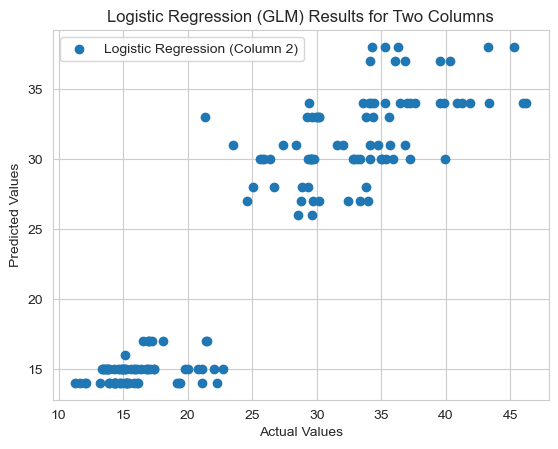

In [65]:
plt.scatter(y_test.iloc[:, 1], glm_predictions_2, label='Logistic Regression (Column 2)')
plt.title('Logistic Regression (GLM) Results for Two Columns')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [71]:
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have x_train, y_train, x_test, and y_test defined
x_train, x_test, y_train, y_test = train_test_split(data_df.values, target_df.values, random_state=42, train_size=0.8)

# Example objective function
def nonlinear_function(params, x, y):
    # Assuming params[0] to params[6] are coefficients for the 7 x-values
    # and params[7] and params[8] are intercepts for the 2 target values

    predicted_y1 = params[7] + np.dot(x, params[:7])  # Target 1 prediction
    predicted_y2 = params[8] + np.dot(x, params[7:])  # Target 2 prediction

    predicted_y = np.column_stack((predicted_y1, predicted_y2))  # Stack predictions for both targets
    return mean_squared_error(y, predicted_y)

# Initial guess for parameters
initial_guess = [0] * 9  # 7 coefficients for x + 2 intercepts

# Nonlinear optimization using scipy's minimize
nlm_result = minimize(nonlinear_function, initial_guess, args=(x_train, y_train), method='Nelder-Mead')

# Extract optimized parameters
nlm_params = nlm_result.x

# Predictions using the optimized parameters
nlm_predictions1 = nlm_params[7] + np.dot(x_test, nlm_params[:7])  # Predictions for Target 1
nlm_predictions2 = nlm_params[8] + np.dot(x_test, nlm_params[7:])  # Predictions for Target 2

# Plotting the results
plt.scatter(y_test[:, 0], nlm_predictions1, color='blue', label='Nonlinear Optimization (NLM) - Target 1')
plt.scatter(y_test[:, 1], nlm_predictions2, color='green', label='Nonlinear Optimization (NLM) - Target 2')

plt.title('Nonlinear Optimization Results')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

ValueError: shapes (614,7) and (2,) not aligned: 7 (dim 1) != 2 (dim 0)